In [ ]:
11/11(화) 10:10

# Support Vector Machine (SVM)

- 딥러닝 이전에 분류에서 뛰어난 성능으로 많이 사용되었던 분류 모델
- 중간 크기의 데이터셋과 특성이(Feature) 많은 복잡한 데이터셋에서 성능이 좋은 것으로 알려져있다.

## 선형(Linear) SVM 

**선 (1)과 (2)중 어떤 선이 최적의 분류 선일까?**

![image.png](images/svm_margin0.png)

(2) 가 최적의 분류를 위한 경계선이다. 이유는 각 클래스의 별로 가장 가까이 있는 데이터간의 거리가 가장 넓기 때문이다. 넓다는 것은 그만큼 겹치는 부분이 적다는 것이므로 새로운 데이터를 예측할 때 모호성이 적어져서 맞을 확률이 더 높아지게 된다. **SVM 모델은 두 클래스 간의 거리를 가장 넓게 분리할 수있는 경계선을 찾는 것을 목표로 한다.**

## SVM 목표: support vector간의 가장 넓은 margin을 가지는 결정경계를 찾는다.

- **Support Vector**
: 양 클래스간에 가장 가까이 있는 값.
    - 결정경계 기준으로 양 클래스의 값들 중 결정경계와 가장 가까이 있는 값.
- **margin**
    - 두 support vector간의 너비
- SVM 모델은 최대 마진(margin)을 만드는 결정경계를 찾는다.

> ### 결정경계(Decision boundary)란
> - 분류 문제에서 클래스들을 구분/분리하는 기준이다.
> - 분류 모델들은 학습시 train dataset을 이용해 결정경계를 찾는다.

![image.png](images/svm_margin.png)

## Hard Margin, Soft Margin

- SVM은 데이터 포인트들을 잘 분리하면서 Margin 의 크기를 최대화하는 것이 목적. 
    - Margin의 최대화에 가장 문제가 되는 것이 Outlier(이상치) 들이다. 
    - Train set의 Outlier들은 Overfitting에 주 원인이 된다.
- Margine을 나눌 때 Outlier을 얼마나 무시할 것인지에 따라 Hard margin과 soft margin으로 나뉜다.
- **Hard Margin**
    - Outlier들을 무시하지 않고 Support Vector를 찾는다. 즉 어떤 데이터 포인트도 결정경계를 침범하지 않도록 한다. 그래서 Support Vector간의 거리(margin)이 매우 좁아 질 수 있다.
    - 선형적으로 분리가능할 때는 잘 작동하지만 그렇지 않을 경우 overfitting 문제 발생 가능. 
- **Soft Margin**    
    - 일부 Outlier들을 무시하고 Support Vector를 찾는다. 즉 일부 데이터 포인트가 결정경계를 침범하여 잘못 분류되는 것을 허용한다. 그래서 Support Vector간의 거리(margin)을 넓힐 수있다.
    - 무시 비율을 하이퍼파라미터 `C`로 정한다. 무시비율이 너무 커지면 underfitting 문제가 발생 가능.

![image.png](images/svm_c.png)

### Hard/Soft margin 설정 하이퍼파라미터 C
- SVM의 규제 하이퍼파라미터.
- 잘못 분류 되는 것을 허용하는 비율 설정 하이퍼파라미터.
- 노이즈가 있는 데이터나 선형적으로 분리 되지 않는 경우 **C값을** 조정해 마진을 변경한다.
- 기본값 1
- 값이 클 수록 무시비율을 낮게 해서 규제를 약하게 한다. 너무 크게 설정 하면 overfitting이 일어날 수 있다.
- 작을 수록 무시비율을 높여 규제를 강하게 한다. 너무 작게 설정 할 경우 underfitting이 일어날 수 있다.
- **Overfitting이 발생하면 값을 작게, Underfitting이 발생하면 크게 조정한다.**

## Kernel SVM (비선형(Non Linear) SVM)
### 비선형데이터 셋에 SVM 적용
- 선형으로 분리가 안되는 경우는?
 
![image.png](images/kernel_svm1.png)

- 다항식 특성을 추가하여 차원을 늘려 선형 분리가 되도록 변환
  
![image.png](images/kernel_svm2.png)

[2차원으로 변환 $x_3=x_1^2$ 항 추가]

![image.png](images/kernel_svm3.png)

[원래 공간으로 변환]

참고: https://www.youtube.com/watch?v=3liCbRZPrZA&t=42s

### Kernel trick(커널 트릭)
- 비선형 데이터셋을 선형으로 분리하기 위해 차원을 변경해야 하는데 이때 사용하는 함수를 **Kernel**이라고 하고 차원을 변경하는 것을 **kernel trick** 이라고 한다.
    - 대표적인 kernel함수 
        - **Radial kernel**
        - Polynomial kernel
        - Sigmoid kernel

### Non linear SVM 모델의 하이퍼파라미터
- C
    - Softmargin과 hard margin 적용 값
- gamma
    - 비선형 결정경계를 얼마나 유연하게 만들 지 조절하는 규제 하이퍼파라미터.
        - Linear SVM의 경우 gamma 값의 영향을 받지 않는다.
    - **개별 데이터포인트가 결정 경계를 만드는데 어느 정도 영향력을 주는지를 설정하는 값** 
        - 값을 크게 하면 개별 데이터 포인트의 결정 경계의 굴곡에 대해 영향을 미치는 범위가 작아진다. 그래서 결정 경계가 데이터 포인트 주변으로 좁혀지게 되어 이상치에 민감해져 overfitting이 발생할 수 있다. 
        - 값을 작게 하면 개별 데이터 포인트의 결정 경계의 굴곡에 대해 영향을 미치는 범위가 넓어져 넓은 결정 경계를 만들고 개별 데이터 포인트에 민감하게 반응하지 않는다. 그래서 너무 작게 하면 underfitting이 발생 가능.
    - **Overfitting이 발생하면 값을 작게, Underfitting이 발생하면 크게 조정.**

#### gamma 값에 따른 결정경계 형태
![gamma](images/svm_gamma.png)

In [ ]:
# 다섯 번 째로 재밌는 수업 
# kernel 

## SVM 모델링
- 데이터 전처리
    - 연속형(수치형) - Feature scaling
    - 범주형 - One Hot Encoding

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 규제 파라미터 변화에 따른 성능 변화

In [5]:
# SVR: 회귀, SVC: 분류
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear SVM - 규제 hyper parameter: C
## 작을 수록 규제 강도가 큼.
C_list = [0.001, 0.01, 0.1, 1, 10, 100] # 0 초과의 값을 지정. 실수. default: 1
train_acc_list = []
test_acc_list = []

for C in C_list:
    svm = SVC(
        kernel="linear", # 커널 함수 지정. 선형SVM: linear, 비선형SVM: rbf(기본), poly, sigmoid
        C=C,             # soft - hard margin 설정. (작을수록 강한 규제)
        random_state=0
    )
    # 학습
    svm.fit(X_train_scaled, y_train)
    # 검증
    ## 추론
    pred_train = svm.predict(X_train_scaled)
    pred_test = svm.predict(X_test_scaled)
    ## 평가
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    "C":np.log10(C_list),  # 그래프 그릴 때는 이렇게 처리.
    # "C": C_list,  # C값이 커질수록 모델 복잡도가 올라간다.
    "Train": train_acc_list,
    "Test": test_acc_list
})
df.set_index("C")

,Train,Test
C,,
-3.0,0.941315,0.930070
-2.0,0.974178,0.972028
-1.0,0.988263,0.972028
0.0,0.990610,0.965035
1.0,0.995305,0.958042
2.0,0.995305,0.958042


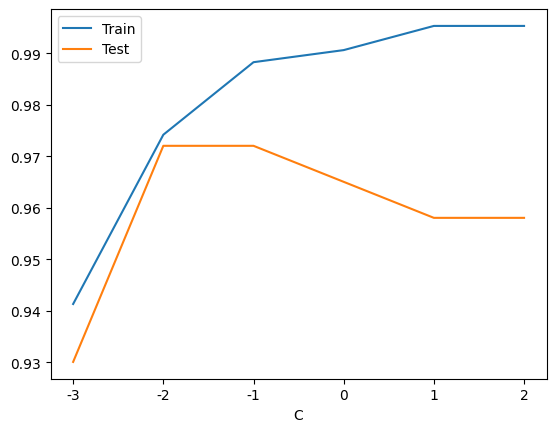

In [8]:
df.set_index("C").plot();

In [9]:
###############################################################################
# 비선형 SVM. Hyper Parameter - C: soft/hard margin 규제, gamma (기본: 1)
#
# gamma 변경에 따른 성능 변화.
###############################################################################
gamma_list = [0.001, 0.01, 0.1, 1, 5, 10, 100]
train_acc_list = []
test_acc_list = []
for gamma in gamma_list:
    svm = SVC(kernel="rbf", C=1, gamma=gamma)  # kernel기본값: rbf
    svm.fit(X_train_scaled, y_train)
    train_acc_list.append(accuracy_score(y_train, svm.predict(X_train_scaled)))
    test_acc_list.append(accuracy_score(y_test, svm.predict(X_test_scaled)))

In [ ]:
df = pd.DataFrame({
    "gamma":np.log10(gamma_list),  # 이것도 너무 차이가 많이 나니까 로그를 사용했구요.
    "Train":train_acc_list,
    "Test":test_acc_list
})
df  # 4, 5, 6 overfitting

,gamma,Train,Test
0,-3.00000,0.950704,0.958042
1,-2.00000,0.976526,0.965035
2,-1.00000,0.995305,0.937063
3,0.00000,1.000000,0.629371
4,0.69897,1.000000,0.629371
5,1.00000,1.000000,0.629371
6,2.00000,1.000000,0.629371


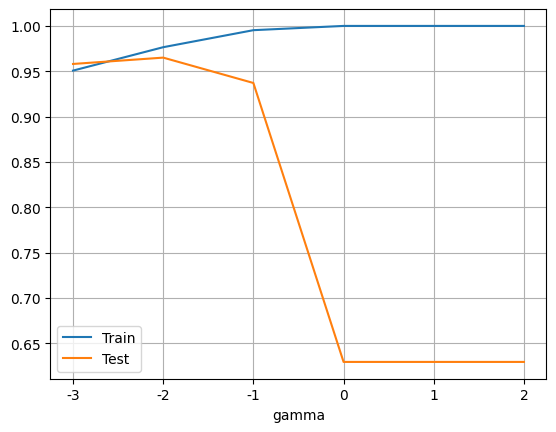

In [11]:
df.set_index("gamma").plot(grid=True);

##### ROC AUC score, AP score 

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

# probability=True 설정해야 predict_proba() 사용가능. 생략하면 False?
svm = SVC(probability=True)  
svm.fit(X_train_scaled, y_train)
pos_proba = svm.predict_proba(X_train_scaled)[:, 1]
print(roc_auc_score(y_train, pos_proba))
print(average_precision_score(y_train, pos_proba))

## GridSearch로 최적의 조합찾기

##### GridSearchCV 생성 및 학습
- LinearSVC: C
- RBF SVC: C, gamma

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# SVM : Feature scaling/One Hot Encoding 전처리.
pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm", SVC(random_state=0, probability=True))
])

params = {
    "svm__kernel": ["linear", "rbf",  "poly", "sigmoid"],
    "svm__C": [0.01, 0.1, 1, 10, 100], 
    "svm__gamma": [0.01, 0.1, 1, 10, 100], 
}

gs = GridSearchCV(
    pipeline, 
    params,
    scoring=["accuracy", "roc_auc", "average_precision"], 
    refit="accuracy",
    cv=4,
    n_jobs=-1
)
gs.fit(X_train, y_train)

,estimator,Pipeline(step...om_state=0))])
,param_grid,"{'svm__C': [0.01, 0.1, ...], 'svm__gamma': [0.01, 0.1, ...], 'svm__kernel': ['linear', 'rbf', ...]}"
,scoring,"['accuracy', 'roc_auc', ...]"
,n_jobs,-1
,refit,'accuracy'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [14]:
gs.best_score_

np.float64(0.9836007758772702)

In [15]:
gs.best_params_

{'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}

In [16]:
gs.best_estimator_

,steps,"[('scaler', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,10
,kernel,'rbf'
,degree,3
,gamma,0.01


In [17]:
pd.DataFrame(gs.cv_results_).sort_values("rank_test_accuracy")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__gamma,param_svm__kernel,params,split0_test_accuracy,split1_test_accuracy,...,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_average_precision,split1_test_average_precision,split2_test_average_precision,split3_test_average_precision,mean_test_average_precision,std_test_average_precision,rank_test_average_precision
61,0.019276,0.001976,0.012058,0.000516,10.0,0.01,rbf,"{'svm__C': 10, 'svm__gamma': 0.01, 'svm__kerne...",0.981308,0.971963,...,0.997195,0.003770,1,0.999567,0.993349,0.999558,0.999774,0.998062,0.002722,1
81,0.018327,0.001107,0.010967,0.000843,100.0,0.01,rbf,"{'svm__C': 100, 'svm__gamma': 0.01, 'svm__kern...",0.962617,0.981308,...,0.995047,0.005339,10,0.997343,0.988904,0.999345,0.999774,0.996342,0.004391,18
56,0.015935,0.000156,0.009764,0.001243,1.0,100.00,linear,"{'svm__C': 1, 'svm__gamma': 100, 'svm__kernel'...",0.962617,0.971963,...,0.994656,0.002734,13,0.996092,0.993223,0.998632,0.997993,0.996485,0.002102,13
40,0.016606,0.001351,0.008879,0.000459,1.0,0.01,linear,"{'svm__C': 1, 'svm__gamma': 0.01, 'svm__kernel...",0.962617,0.971963,...,0.994656,0.002734,13,0.996092,0.993223,0.998632,0.997993,0.996485,0.002102,13
44,0.018372,0.002769,0.009706,0.001833,1.0,0.10,linear,"{'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel'...",0.962617,0.971963,...,0.994656,0.002734,13,0.996092,0.993223,0.998632,0.997993,0.996485,0.002102,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,0.081870,0.001511,0.029079,0.002831,0.1,1.00,rbf,"{'svm__C': 0.1, 'svm__gamma': 1, 'svm__kernel'...",0.626168,0.626168,...,0.962045,0.011180,81,0.976195,0.975670,0.983746,0.971709,0.976830,0.004353,59
93,0.074301,0.022326,0.019931,0.006587,100.0,10.00,rbf,"{'svm__C': 100, 'svm__gamma': 10, 'svm__kernel...",0.626168,0.626168,...,0.757464,0.026645,91,0.821953,0.816306,0.822792,0.788729,0.812445,0.013918,91
77,0.082982,0.005090,0.025711,0.000447,10.0,100.00,rbf,"{'svm__C': 10, 'svm__gamma': 100, 'svm__kernel...",0.626168,0.626168,...,0.500000,0.000000,96,0.626168,0.626168,0.632075,0.622642,0.626763,0.003388,96
73,0.094226,0.005590,0.027240,0.000956,10.0,10.00,rbf,"{'svm__C': 10, 'svm__gamma': 10, 'svm__kernel'...",0.626168,0.626168,...,0.757464,0.026645,91,0.821953,0.816306,0.822792,0.788729,0.812445,0.013918,91
